In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
# standardize input to [0, 1]
x_train = x_train/255
x_test = x_test/255

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

In [9]:
model = Sequential()

model.add(Conv2D(32, (4,4), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               409856    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=2)

In [12]:
model.fit(x_train, y_train_cat, epochs=100, callbacks=[early_stop], validation_data=(x_test, y_test_cat))

Epoch 1/100
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4203 - accuracy: 0.4868 - val_loss: 1.1692 - val_accuracy: 0.5850
Epoch 2/100
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0681 - accuracy: 0.6268 - val_loss: 1.0492 - val_accuracy: 0.6336
Epoch 3/100
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9096 - accuracy: 0.6841 - val_loss: 0.9642 - val_accuracy: 0.6730
Epoch 4/100
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7855 - accuracy: 0.7257 - val_loss: 0.9515 - val_accuracy: 0.6711
Epoch 5/100
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6797 - accuracy: 0.7631 - val_loss: 0.9751 - val_accuracy: 0.6671
Epoch 6/100
1563/1563 [==============================] - 29s 18ms/step - loss: 0.5780 - accuracy: 0.7966 - val_loss: 0.9695 - val_accuracy: 0.6818


In [13]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = np.argmax(model.predict(x_test), axis=-1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      1000
           1       0.84      0.78      0.81      1000
           2       0.61      0.55      0.58      1000
           3       0.46      0.59      0.52      1000
           4       0.64      0.63      0.63      1000
           5       0.61      0.54      0.57      1000
           6       0.85      0.65      0.74      1000
           7       0.76      0.73      0.74      1000
           8       0.68      0.84      0.76      1000
           9       0.77      0.77      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



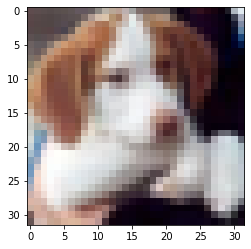

In [14]:
my_image = x_test[16]
plt.imshow(my_image)

In [15]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_image.reshape(1,32,32,3))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5], dtype=int64)

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def predict_image(path):
    img = load_img(path, target_size=(32, 32))
    img = img_to_array(img)/255
    img = img.reshape(1, 32, 32, 3)
    prediction = np.argmax(model.predict(img), axis=-1) [0]
    return class_names[prediction]

In [17]:
predict_image('images/dog.jpg')

'dog'

In [18]:
model.save('image_classifier.tf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: image_classifier.tf\assets


In [19]:
import os

In [21]:
os.listdir('model.py')

NotADirectoryError: [WinError 267] Der Verzeichnisname ist ungültig: 'model.py'